In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
def process_data(train):
    train['fact_dt'] = train['fact_dt'].apply(lambda x: int(x[:x.find(' ')]))
    a=pd.get_dummies(train.entity_0017_cd)
    train['a'] = a.a
    train['b'] = a.b
    train['c'] = a.c
    train['d'] = a.d
    train = train.drop(['entity_0017_cd'],axis=1)
    missing_data = train.isnull()
    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(" ")
    print(f'entity_0006_rt: {round(train.entity_0006_rt.isnull().sum()/106235,2)}')
    print(f'entity_0007_ct: {round(train.entity_0007_ct.isnull().sum()/106235,2)}')
    print(f'entity_0008_ct: {round(train.entity_0008_ct.isnull().sum()/106235,2)}')
    print(f'entity_0009_rt: {round(train.entity_0009_rt.isnull().sum()/106235,2)}')
    print(f'entity_0010_rt: {round(train.entity_0010_rt.isnull().sum()/106235,2)}')
    print(f'entity_0012_ct: {round(train.entity_0012_ct.isnull().sum()/106235,2)}')
    print(f'entity_0014_rt: {round(train.entity_0014_rt.isnull().sum()/106235,2)}')
    print(f'entity_0015_ct: {round(train.entity_0015_ct.isnull().sum()/106235,2)}')
    train = train.drop(['entity_0007_ct','entity_0008_ct','entity_0009_rt','entity_0015_ct'],axis=1)
    train.entity_0006_rt = train.entity_0006_rt.fillna(train.entity_0006_rt.median())
    train.entity_0010_rt = train.entity_0010_rt.fillna(train.entity_0010_rt.median())
    train.entity_0012_ct = train.entity_0012_ct.fillna(train.entity_0012_ct.median())
    train.entity_0014_rt = train.entity_0014_rt.fillna(train.entity_0014_rt.median())
    train = train.drop(['emb_0007','emb_0027','emb_0010','emb_0025','emb_0028','emb_0045','emb_0046','entity_0012_ct','entity_0016_rt','entity_0002_ct','emb_0059','emb_0051','emb_0053','emb_0055','a','entity_0006_rt','entity_0016_rt','entity_0002_ct','entity_0001_ct'],axis=1)
    return train

In [4]:
test = pd.read_csv('test.csv')

In [5]:
test = process_data(test)
train = process_data(train)

Id
False    26824
Name: Id, dtype: int64
 
user_id
False    26824
Name: user_id, dtype: int64
 
fact_dt
False    26824
Name: fact_dt, dtype: int64
 
emb_0000
False    26824
Name: emb_0000, dtype: int64
 
emb_0001
False    26824
Name: emb_0001, dtype: int64
 
emb_0002
False    26824
Name: emb_0002, dtype: int64
 
emb_0003
False    26824
Name: emb_0003, dtype: int64
 
emb_0004
False    26824
Name: emb_0004, dtype: int64
 
emb_0005
False    26824
Name: emb_0005, dtype: int64
 
emb_0006
False    26824
Name: emb_0006, dtype: int64
 
emb_0007
False    26824
Name: emb_0007, dtype: int64
 
emb_0008
False    26824
Name: emb_0008, dtype: int64
 
emb_0009
False    26824
Name: emb_0009, dtype: int64
 
emb_0010
False    26824
Name: emb_0010, dtype: int64
 
emb_0011
False    26824
Name: emb_0011, dtype: int64
 
emb_0012
False    26824
Name: emb_0012, dtype: int64
 
emb_0013
False    26824
Name: emb_0013, dtype: int64
 
emb_0014
False    26824
Name: emb_0014, dtype: int64
 
emb_0015
False    26824
Na

True     105917
False       318
Name: entity_0007_ct, dtype: int64
 
entity_0008_ct
True     80872
False    25363
Name: entity_0008_ct, dtype: int64
 
entity_0009_rt
False    53533
True     52702
Name: entity_0009_rt, dtype: int64
 
entity_0010_rt
False    80846
True     25389
Name: entity_0010_rt, dtype: int64
 
entity_0011_ct
False    106235
Name: entity_0011_ct, dtype: int64
 
entity_0012_ct
False    100611
True       5624
Name: entity_0012_ct, dtype: int64
 
entity_0013_ct
False    106235
Name: entity_0013_ct, dtype: int64
 
entity_0014_rt
False    100611
True       5624
Name: entity_0014_rt, dtype: int64
 
entity_0015_ct
True     80872
False    25363
Name: entity_0015_ct, dtype: int64
 
entity_0016_rt
False    106235
Name: entity_0016_rt, dtype: int64
 
target
False    106235
Name: target, dtype: int64
 
a
False    106235
Name: a, dtype: int64
 
b
False    106235
Name: b, dtype: int64
 
c
False    106235
Name: c, dtype: int64
 
d
False    106235
Name: d, dtype: int64
 
entity_0006

In [118]:
test.head(15)

Id  user_id  fact_dt  emb_0000  emb_0001  emb_0002  emb_0003  emb_0004  \
0    0   104363      552 -1.786346  2.074665 -1.504628  1.143300 -0.979666   
1    1   104364      152 -1.555227  1.703838 -1.682477  1.143936 -1.363388   
2    2   104365      714 -1.350453  1.907620 -1.563653  1.271580 -0.902961   
3    3   104366        5 -1.757556  2.429529 -1.438695  0.913385  0.016773   
4    4   104367      720 -1.466042  1.946119 -1.857461  1.244526 -0.474639   
5    5   104368      540 -1.787953  2.141758 -1.671655  0.942334 -0.543511   
6    6   104369      208 -0.991530  2.154426 -1.311974  0.774950 -1.097604   
7    7   104370       28 -0.837172  1.621680 -1.212976  0.887666  0.287511   
8    8   104371      489 -1.707114  1.979518 -1.856248  1.292128 -0.820143   
9    9   104372      546 -1.596302  1.810488 -1.972449  1.428247 -0.403902   
10  10   104373        7 -1.150146  1.856757 -1.376038  0.669676 -1.307906   
11  11   104374      554 -1.750169  1.977905 -1.665367  1.404143 -0.976417   
12  12   104375      449 -0.928473  2.150935 -1.392275  1.445342 -0.743770   
13  13   104376      704 -1.689470  1.977623 -1.202052  0.882899 -0.839016   
14  14   104377      847 -1.947584  1.759802 -1.583606  0.798676 -0.558779   

    emb_0005  emb_0006  ...  entity_0006_rt  entity_0010_rt  entity_0011_ct  \
0   0.750931  1.091962  ...        0.974990        0.997459               3   
1   0.921123  1.209163  ...        0.987894        1.000000               1   
2   0.582773  1.127565  ...        0.991317        1.000000               2   
3   0.629686  1.096519  ...        0.980202        1.000000               1   
4   0.481864  0.748999  ...        0.991001        1.000000               2   
5   0.711363  1.156633  ...        0.966064        1.000000               4   
6   0.344470  1.008328  ...        0.991064        0.907764               2   
7   0.293695  0.495320  ...        0.991319        1.000000               2   
8   0.999664  1.158637  ...        0.989266        1.000000               2   
9   0.797522  0.955425  ...        0.979060        1.000000               3   
10  0.877742  1.134663  ...        0.906632        1.000000               2   
11  1.111816  1.296366  ...        0.967522        1.000000               3   
12  0.348977  0.868927  ...        0.943549        1.000000               1   
13  0.565590  0.605136  ...        0.991752        0.998436               5   
14  0.692384  1.065254  ...        0.992703        1.000000               3   

    entity_0013_ct  entity_0014_rt  entity_0016_rt  a  b  c  d  
0              173        2.300125       -0.003703  0  0  0  1  
1               54        1.598273       -0.009720  1  0  0  0  
2              109        1.368001       -0.011771  0  0  0  1  
3               19        2.023099        0.009288  1  0  0  0  
4              125        1.388213        0.002893  0  0  0  1  
5              568        2.677693        0.016745  0  0  0  1  
6              222        1.343933        0.006411  0  0  0  1  
7              164        1.337247       -0.023295  0  0  0  1  
8              340        1.510110       -0.011643  0  0  0  1  
9               28        2.122492        0.009906  0  0  0  1  
10              27        4.400117       -0.004412  1  0  0  0  
11              98        2.626162        0.003862  0  0  0  1  
12             206        3.395235       -0.013827  0  0  0  1  
13             347        1.299358       -0.022177  0  0  0  1  
14             149        1.250547        0.001183  0  0  0  1  

[15 rows x 82 columns]

In [122]:
train.shape

(106235, 82)

In [121]:
test.shape

(26824, 82)

In [81]:
missing_data = train.isnull()
missing_data.head(6)

user_id  fact_dt  emb_0000  emb_0001  emb_0002  emb_0003  emb_0004  \
0    False    False     False     False     False     False     False   
1    False    False     False     False     False     False     False   
2    False    False     False     False     False     False     False   
3    False    False     False     False     False     False     False   
4    False    False     False     False     False     False     False   
5    False    False     False     False     False     False     False   

   emb_0005  emb_0006  emb_0007  ...  entity_0011_ct  entity_0012_ct  \
0     False     False     False  ...           False           False   
1     False     False     False  ...           False           False   
2     False     False     False  ...           False           False   
3     False     False     False  ...           False           False   
4     False     False     False  ...           False           False   
5     False     False     False  ...           False           False   

   entity_0013_ct  entity_0014_rt  entity_0016_rt  target      a      b  \
0           False           False           False   False  False  False   
1           False           False           False   False  False  False   
2           False           False           False   False  False  False   
3           False           False           False   False  False  False   
4           False           False           False   False  False  False   
5           False           False           False   False  False  False   

       c      d  
0  False  False  
1  False  False  
2  False  False  
3  False  False  
4  False  False  
5  False  False  

[6 rows x 83 columns]

In [82]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")


user_id
False    106235
Name: user_id, dtype: int64
 
fact_dt
False    106235
Name: fact_dt, dtype: int64
 
emb_0000
False    106235
Name: emb_0000, dtype: int64
 
emb_0001
False    106235
Name: emb_0001, dtype: int64
 
emb_0002
False    106235
Name: emb_0002, dtype: int64
 
emb_0003
False    106235
Name: emb_0003, dtype: int64
 
emb_0004
False    106235
Name: emb_0004, dtype: int64
 
emb_0005
False    106235
Name: emb_0005, dtype: int64
 
emb_0006
False    106235
Name: emb_0006, dtype: int64
 
emb_0007
False    106235
Name: emb_0007, dtype: int64
 
emb_0008
False    106235
Name: emb_0008, dtype: int64
 
emb_0009
False    106235
Name: emb_0009, dtype: int64
 
emb_0010
False    106235
Name: emb_0010, dtype: int64
 
emb_0011
False    106235
Name: emb_0011, dtype: int64
 
emb_0012
False    106235
Name: emb_0012, dtype: int64
 
emb_0013
False    106235
Name: emb_0013, dtype: int64
 
emb_0014
False    106235
Name: emb_0014, dtype: int64
 
emb_0015
False    106235
Name: emb_0015, dtype: int6

In [58]:
null_columns = ['entity_0006_rt','entity_0007_ct', 'entity_0008_ct','entity_0009_rt','entity_0010_rt','entity_0012_ct','entity_0014_rt','entity_0015_ct']

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106235 entries, 0 to 106234
Data columns (total 83 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         106235 non-null  int64  
 1   fact_dt         106235 non-null  int64  
 2   emb_0000        106235 non-null  float64
 3   emb_0001        106235 non-null  float64
 4   emb_0002        106235 non-null  float64
 5   emb_0003        106235 non-null  float64
 6   emb_0004        106235 non-null  float64
 7   emb_0005        106235 non-null  float64
 8   emb_0006        106235 non-null  float64
 9   emb_0007        106235 non-null  float64
 10  emb_0008        106235 non-null  float64
 11  emb_0009        106235 non-null  float64
 12  emb_0010        106235 non-null  float64
 13  emb_0011        106235 non-null  float64
 14  emb_0012        106235 non-null  float64
 15  emb_0013        106235 non-null  float64
 16  emb_0014        106235 non-null  float64
 17  emb_0015  

<AxesSubplot:>

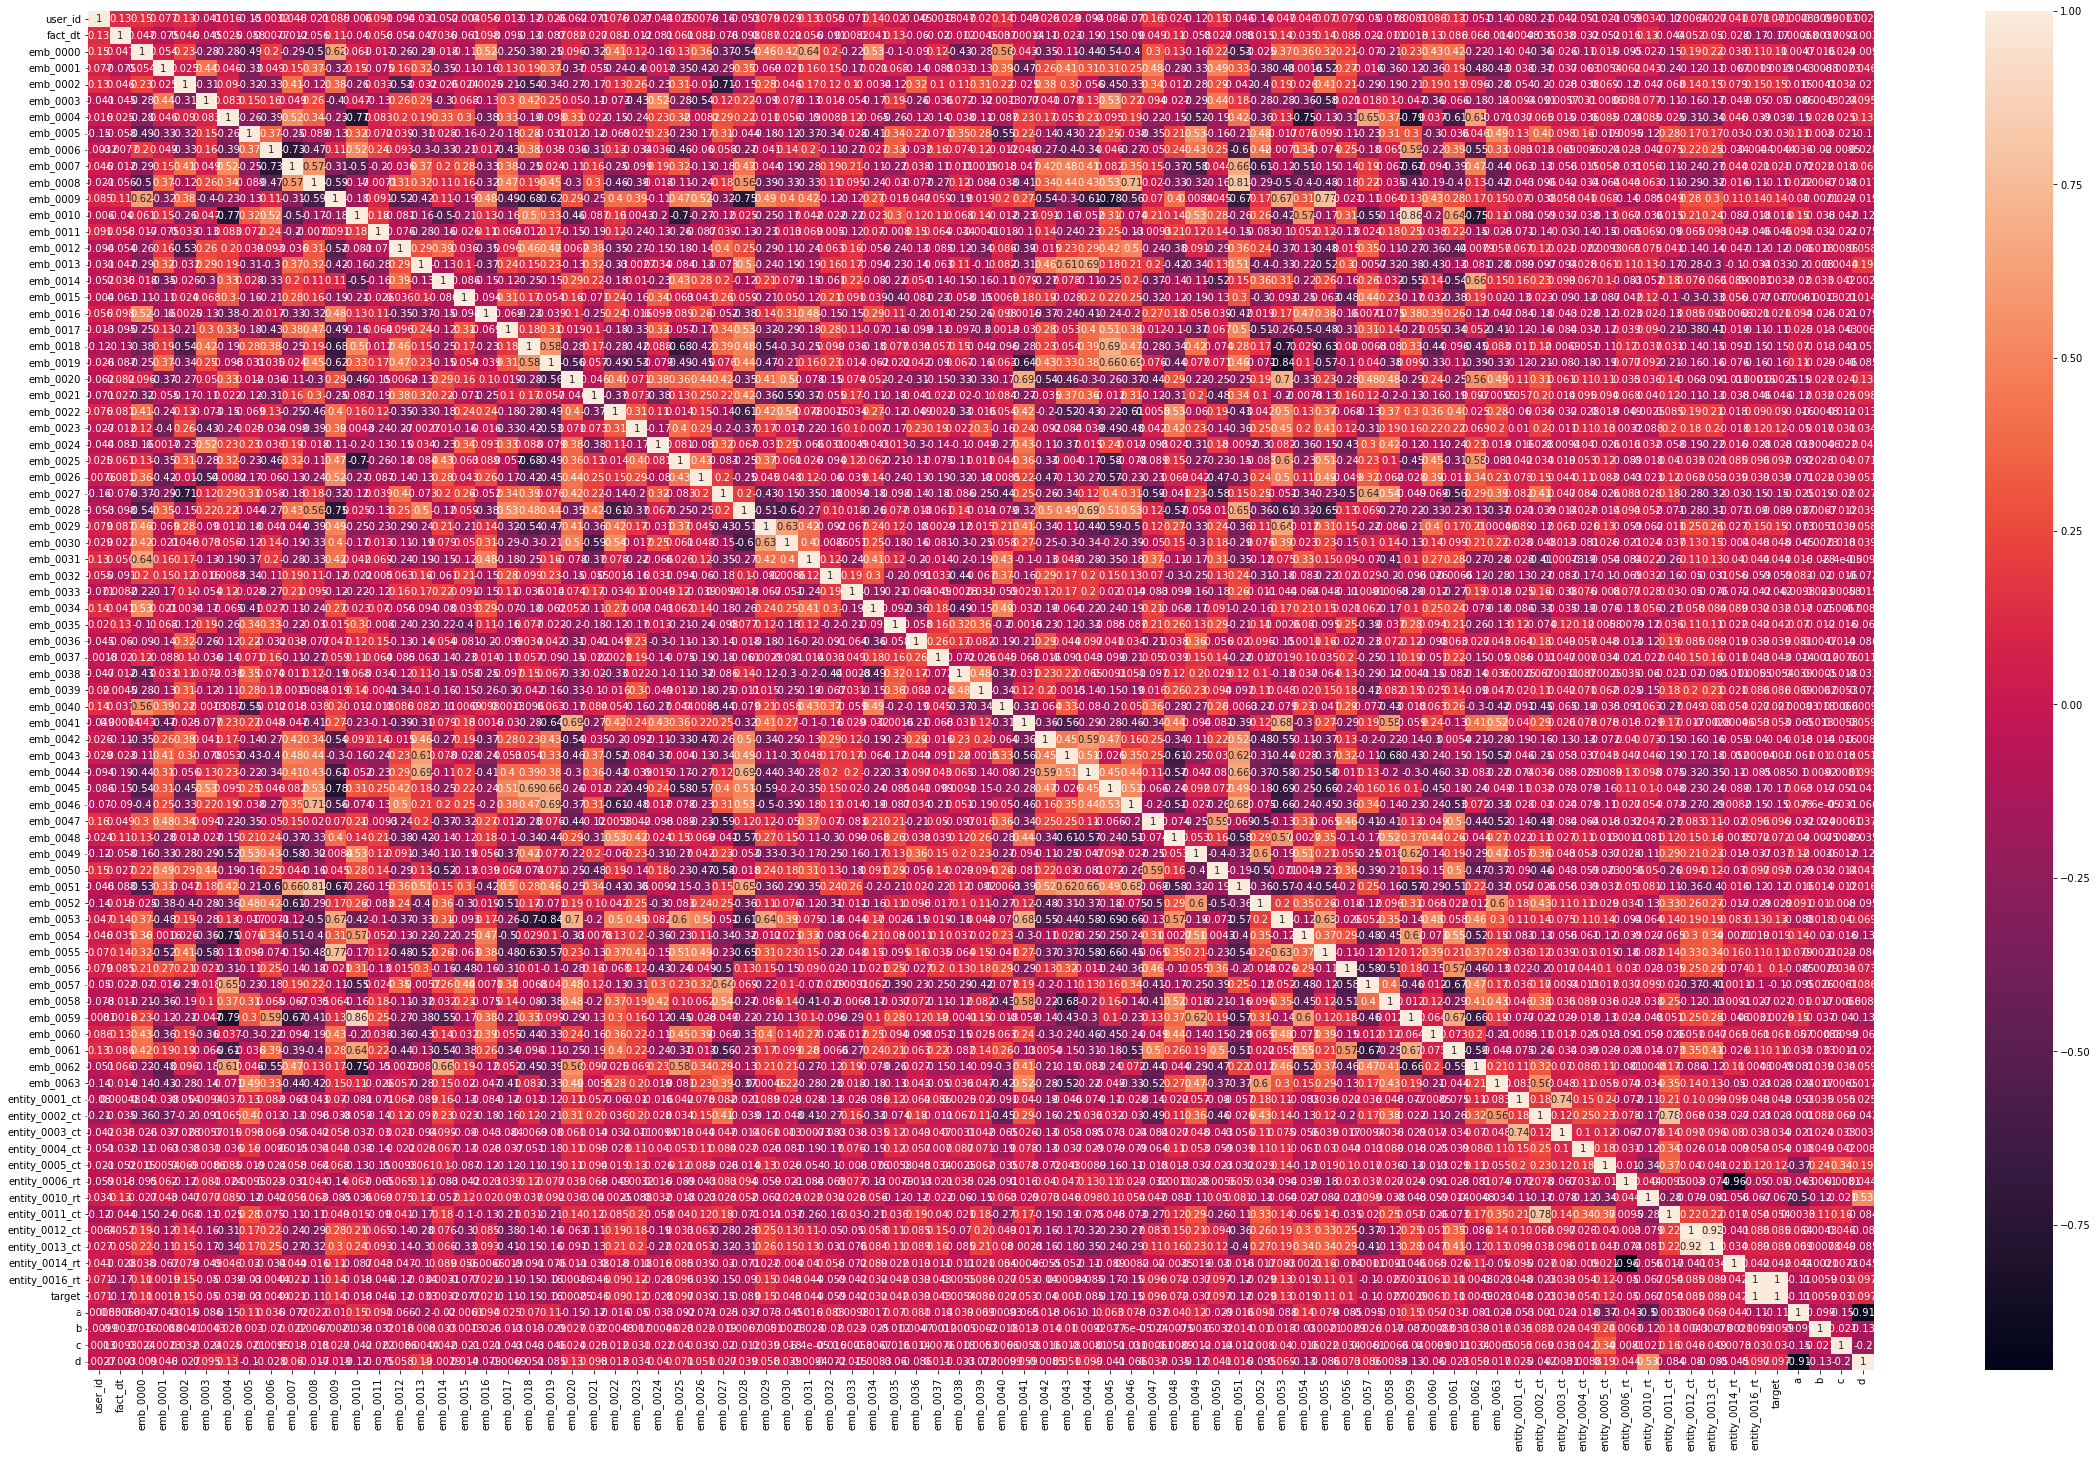

In [91]:
plt.figure(figsize=(40,25))
sns.heatmap(train.corr(), annot=True)

In [ ]:
'emb_0007','emb_0027','emb_0010','emb_0025','emb_0028','emb_0045','emb_0046','entity_0012_ct','entity_0016_rt','entity_0002_ct','emb_0059','emb_0051','emb_0053','emb_0055','a','entity_0006_rt'

<AxesSubplot:>

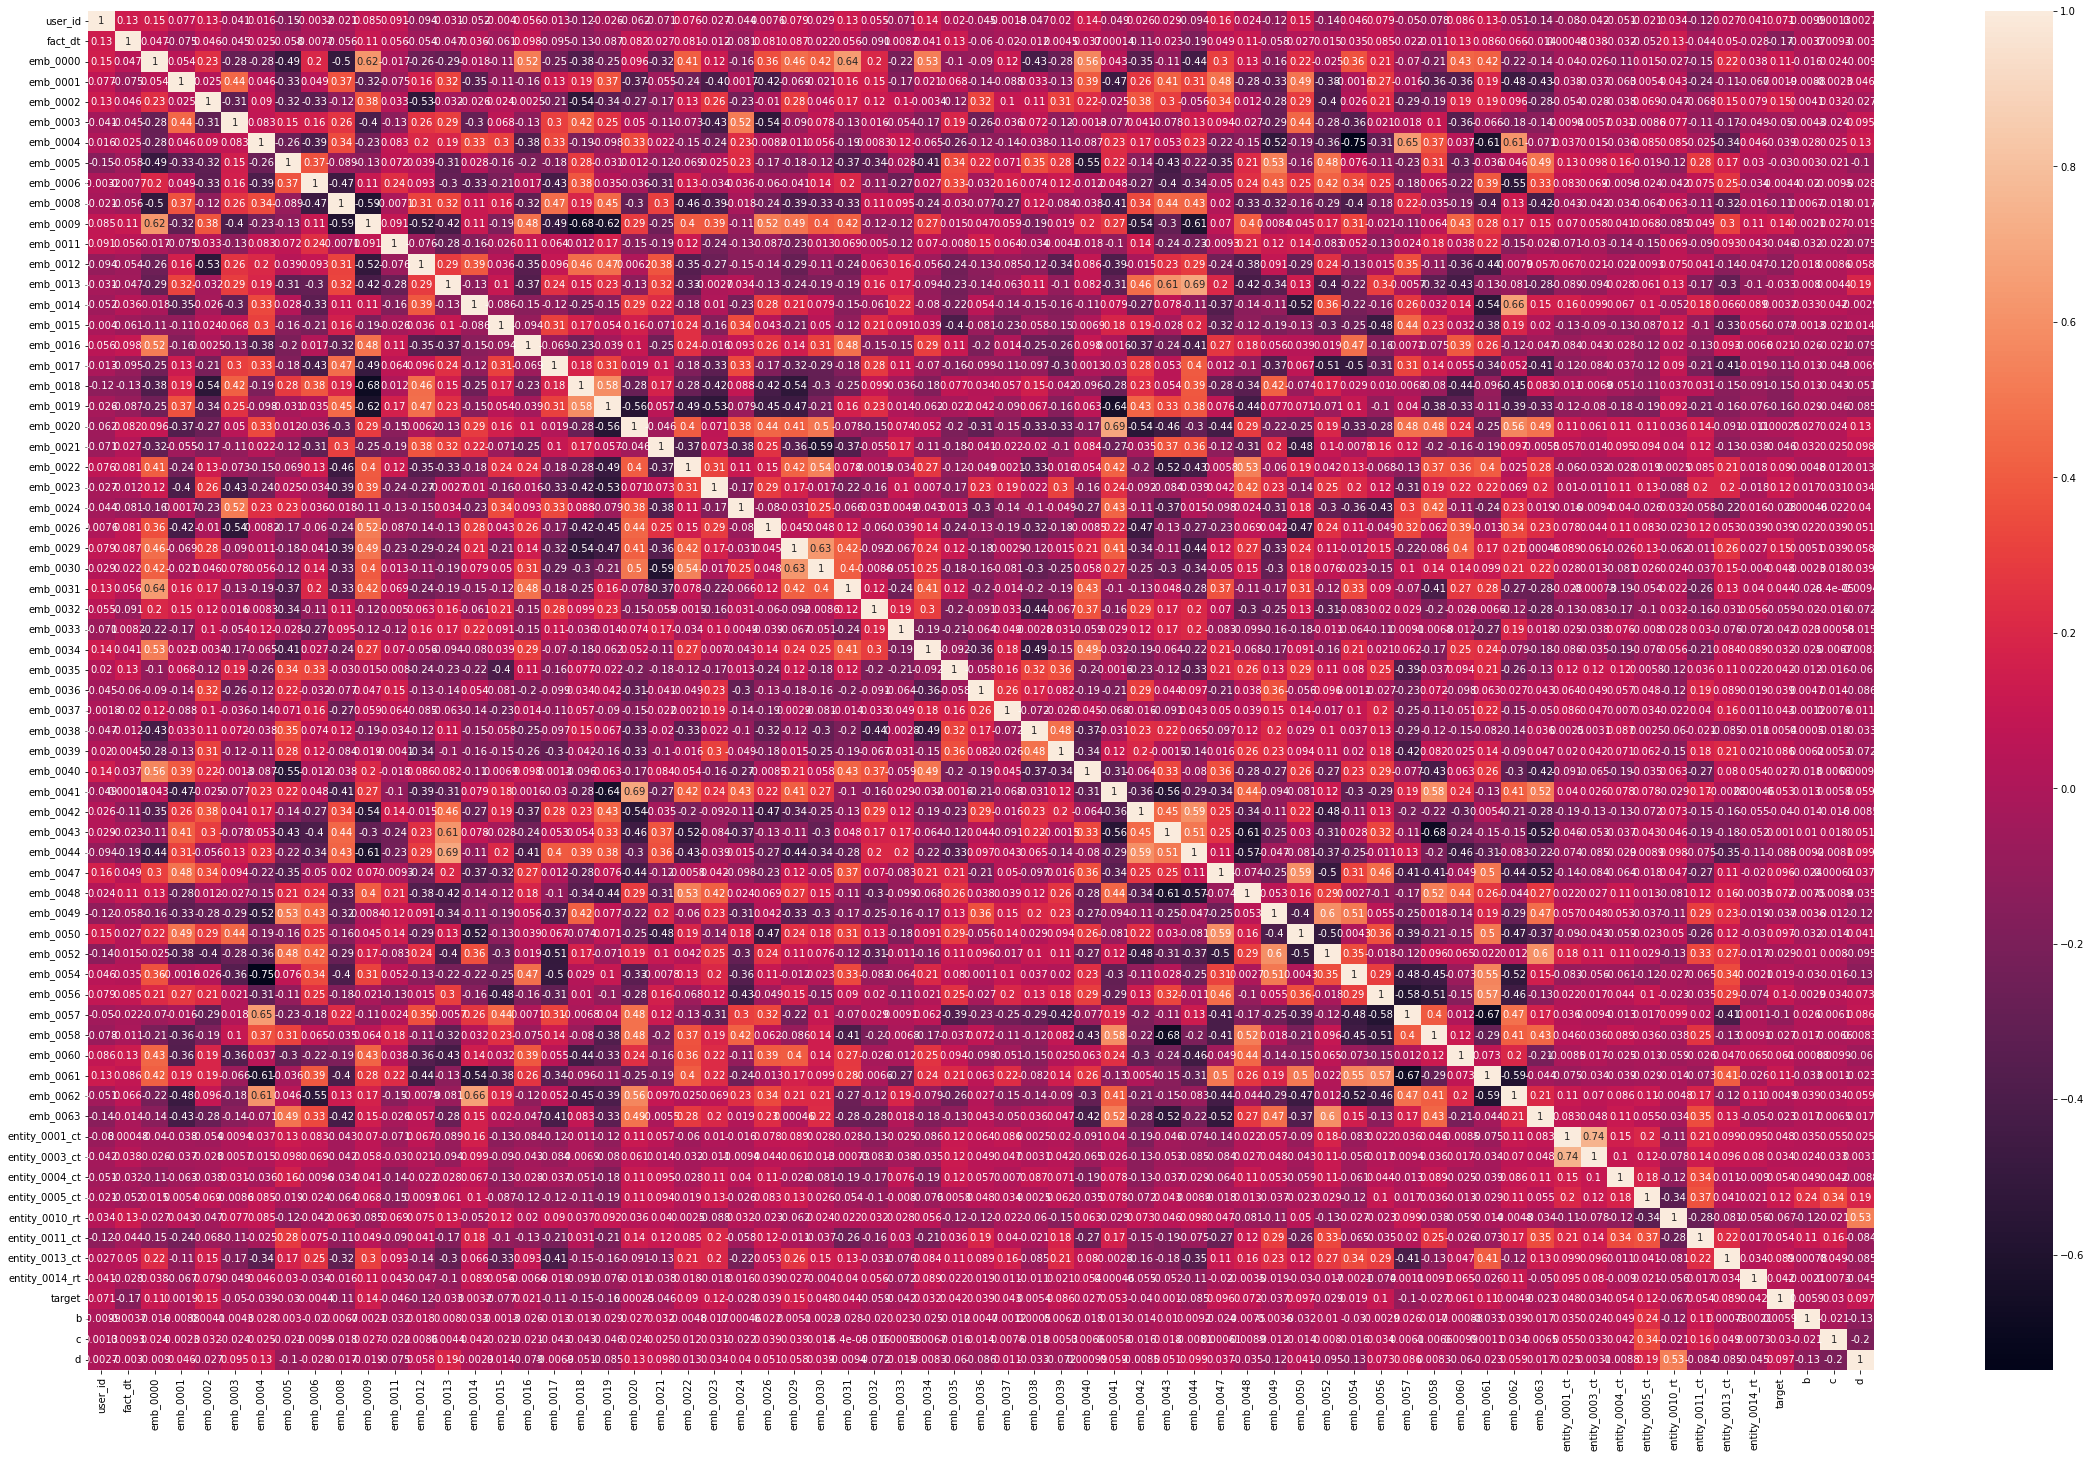

In [78]:
plt.figure(figsize=(40,25))
sns.heatmap(train.corr(), annot=True)# after delete some columns

In [79]:
train.shape

(106235, 67)

In [ ]:
# Dropping constant features

In [7]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(train)

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [10]:
constant_columns = [column for column in train.columns
                   if column not in train.columns[var_thres.get_support()]]

In [11]:
constant_columns

[]

In [ ]:
# Information gain

In [6]:
X = train.drop(['target'],axis=1)
y = train['target']

In [7]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([1.14006286e-02, 7.53173486e-02, 9.98385419e-03, 2.81850272e-03,
       1.33491468e-02, 2.73814319e-03, 2.64183585e-03, 2.92156328e-03,
       0.00000000e+00, 8.24436162e-03, 1.16799600e-02, 6.99053858e-04,
       7.43488322e-03, 2.44481434e-03, 1.39824665e-03, 3.81619085e-03,
       0.00000000e+00, 9.07640360e-03, 1.30261669e-02, 1.30707313e-02,
       1.70657898e-03, 3.13202751e-03, 6.96707788e-03, 6.20163838e-03,
       0.00000000e+00, 3.06601459e-03, 1.23359340e-02, 2.80360077e-03,
       3.46253915e-03, 9.00805642e-04, 2.19915583e-03, 3.59904969e-03,
       2.68680046e-03, 8.52999678e-06, 5.63575719e-03, 3.38759139e-03,
       4.41927208e-03, 3.89379726e-03, 2.80774087e-03, 2.18771965e-03,
       2.05374391e-04, 4.96642415e-03, 5.41307299e-03, 3.05464628e-03,
       6.42590534e-03, 4.80091779e-03, 2.17471481e-03, 2.71118998e-03,
       6.70537911e-03, 6.68202882e-03, 1.72112310e-04, 3.25493019e-03,
       8.71526593e-03, 9.16824309e-04, 1.94148996e-03, 3.93262609e-03,
      

In [8]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

fact_dt     0.075317
emb_0002    0.013349
emb_0019    0.013071
emb_0018    0.013026
emb_0029    0.012336
              ...   
emb_0036    0.000009
emb_0024    0.000000
emb_0006    0.000000
b           0.000000
emb_0016    0.000000
Length: 65, dtype: float64

<AxesSubplot:>

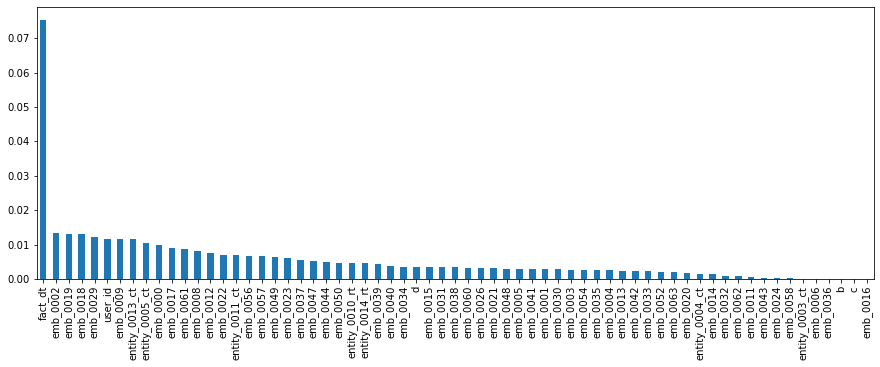

In [16]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15, 5))

In [9]:
from sklearn.feature_selection import SelectPercentile

In [10]:
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X, y)
X.columns[selected_top_columns.get_support()]

Index(['user_id', 'fact_dt', 'emb_0000', 'emb_0002', 'emb_0009', 'emb_0017',
       'emb_0018', 'emb_0019', 'emb_0029', 'emb_0061', 'entity_0005_ct',
       'entity_0013_ct', 'd'],
      dtype='object')

In [11]:
columns = X.columns[selected_top_columns.get_support()]

In [12]:
columns

Index(['user_id', 'fact_dt', 'emb_0000', 'emb_0002', 'emb_0009', 'emb_0017',
       'emb_0018', 'emb_0019', 'emb_0029', 'emb_0061', 'entity_0005_ct',
       'entity_0013_ct', 'd'],
      dtype='object')

In [13]:
data = train[columns]
data.shape

(106235, 13)

In [14]:
data = train

In [15]:
train = data

In [16]:
# Catboost

In [41]:
from catboost import CatBoostRegressor, Pool

from sklearn.model_selection import train_test_split
import numpy as np

X = train.drop(['target'],axis=1)
y = train['target']
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2)

train_pool = Pool(X, y)
eval_pool = Pool(X_eval, y_eval)

model = CatBoostRegressor(loss_function='RMSE', eval_metric='AUC', iterations=1000, random_seed=63, learning_rate=0.75)

model.fit(X, y, eval_set=eval_pool)

0:	test: 0.7382526	best: 0.7382526 (0)	total: 76.1ms	remaining: 38s
1:	test: 0.7601736	best: 0.7601736 (1)	total: 129ms	remaining: 32.2s
2:	test: 0.7705274	best: 0.7705274 (2)	total: 171ms	remaining: 28.4s
3:	test: 0.7790667	best: 0.7790667 (3)	total: 217ms	remaining: 26.9s
4:	test: 0.7831274	best: 0.7831274 (4)	total: 284ms	remaining: 28.2s
5:	test: 0.7870863	best: 0.7870863 (5)	total: 346ms	remaining: 28.5s
6:	test: 0.7912889	best: 0.7912889 (6)	total: 393ms	remaining: 27.7s
7:	test: 0.7929554	best: 0.7929554 (7)	total: 457ms	remaining: 28.1s
8:	test: 0.7943452	best: 0.7943452 (8)	total: 521ms	remaining: 28.4s
9:	test: 0.7961383	best: 0.7961383 (9)	total: 572ms	remaining: 28s
10:	test: 0.7973343	best: 0.7973343 (10)	total: 627ms	remaining: 27.9s
11:	test: 0.7980495	best: 0.7980495 (11)	total: 690ms	remaining: 28s
12:	test: 0.7996044	best: 0.7996044 (12)	total: 747ms	remaining: 28s
13:	test: 0.8012422	best: 0.8012422 (13)	total: 810ms	remaining: 28.1s
14:	test: 0.8028288	best: 0.80282

116:	test: 0.8718787	best: 0.8718787 (116)	total: 6.46s	remaining: 21.1s
117:	test: 0.8723029	best: 0.8723029 (117)	total: 6.52s	remaining: 21.1s
118:	test: 0.8728015	best: 0.8728015 (118)	total: 6.56s	remaining: 21s
119:	test: 0.8732170	best: 0.8732170 (119)	total: 6.64s	remaining: 21s
120:	test: 0.8737034	best: 0.8737034 (120)	total: 6.71s	remaining: 21s
121:	test: 0.8741155	best: 0.8741155 (121)	total: 6.76s	remaining: 21s
122:	test: 0.8744982	best: 0.8744982 (122)	total: 6.82s	remaining: 20.9s
123:	test: 0.8752753	best: 0.8752753 (123)	total: 6.88s	remaining: 20.9s
124:	test: 0.8757663	best: 0.8757663 (124)	total: 6.94s	remaining: 20.8s
125:	test: 0.8765300	best: 0.8765300 (125)	total: 6.98s	remaining: 20.7s
126:	test: 0.8770543	best: 0.8770543 (126)	total: 7.02s	remaining: 20.6s
127:	test: 0.8772756	best: 0.8772756 (127)	total: 7.07s	remaining: 20.5s
128:	test: 0.8775551	best: 0.8775551 (128)	total: 7.12s	remaining: 20.5s
129:	test: 0.8778955	best: 0.8778955 (129)	total: 7.17s	rem

232:	test: 0.9131561	best: 0.9131561 (232)	total: 12.1s	remaining: 13.8s
233:	test: 0.9133161	best: 0.9133161 (233)	total: 12.1s	remaining: 13.8s
234:	test: 0.9134495	best: 0.9134495 (234)	total: 12.2s	remaining: 13.7s
235:	test: 0.9137060	best: 0.9137060 (235)	total: 12.2s	remaining: 13.7s
236:	test: 0.9139280	best: 0.9139280 (236)	total: 12.3s	remaining: 13.6s
237:	test: 0.9140872	best: 0.9140872 (237)	total: 12.3s	remaining: 13.5s
238:	test: 0.9141371	best: 0.9141371 (238)	total: 12.4s	remaining: 13.5s
239:	test: 0.9143561	best: 0.9143561 (239)	total: 12.4s	remaining: 13.4s
240:	test: 0.9144817	best: 0.9144817 (240)	total: 12.5s	remaining: 13.4s
241:	test: 0.9146715	best: 0.9146715 (241)	total: 12.5s	remaining: 13.4s
242:	test: 0.9149791	best: 0.9149791 (242)	total: 12.6s	remaining: 13.3s
243:	test: 0.9151927	best: 0.9151927 (243)	total: 12.6s	remaining: 13.2s
244:	test: 0.9152606	best: 0.9152606 (244)	total: 12.7s	remaining: 13.2s
245:	test: 0.9157383	best: 0.9157383 (245)	total: 1

349:	test: 0.9385169	best: 0.9385169 (349)	total: 18.5s	remaining: 7.92s
350:	test: 0.9388140	best: 0.9388140 (350)	total: 18.6s	remaining: 7.88s
351:	test: 0.9389318	best: 0.9389318 (351)	total: 18.7s	remaining: 7.84s
352:	test: 0.9390807	best: 0.9390807 (352)	total: 18.7s	remaining: 7.79s
353:	test: 0.9392897	best: 0.9392897 (353)	total: 18.8s	remaining: 7.75s
354:	test: 0.9393180	best: 0.9393180 (354)	total: 18.9s	remaining: 7.7s
355:	test: 0.9396256	best: 0.9396256 (355)	total: 18.9s	remaining: 7.65s
356:	test: 0.9398864	best: 0.9398864 (356)	total: 19s	remaining: 7.61s
357:	test: 0.9401917	best: 0.9401917 (357)	total: 19.1s	remaining: 7.56s
358:	test: 0.9406640	best: 0.9406640 (358)	total: 19.1s	remaining: 7.5s
359:	test: 0.9407257	best: 0.9407257 (359)	total: 19.1s	remaining: 7.45s
360:	test: 0.9408796	best: 0.9408796 (360)	total: 19.2s	remaining: 7.39s
361:	test: 0.9411681	best: 0.9411681 (361)	total: 19.3s	remaining: 7.34s
362:	test: 0.9412957	best: 0.9412957 (362)	total: 19.3s

466:	test: 0.9573897	best: 0.9573897 (466)	total: 25.7s	remaining: 1.81s
467:	test: 0.9576282	best: 0.9576282 (467)	total: 25.7s	remaining: 1.76s
468:	test: 0.9576337	best: 0.9576337 (468)	total: 25.8s	remaining: 1.7s
469:	test: 0.9577991	best: 0.9577991 (469)	total: 25.8s	remaining: 1.65s
470:	test: 0.9578910	best: 0.9578910 (470)	total: 25.9s	remaining: 1.59s
471:	test: 0.9580153	best: 0.9580153 (471)	total: 25.9s	remaining: 1.54s
472:	test: 0.9580584	best: 0.9580584 (472)	total: 26s	remaining: 1.48s
473:	test: 0.9581634	best: 0.9581634 (473)	total: 26s	remaining: 1.43s
474:	test: 0.9582777	best: 0.9582777 (474)	total: 26.1s	remaining: 1.37s
475:	test: 0.9584197	best: 0.9584197 (475)	total: 26.1s	remaining: 1.32s
476:	test: 0.9586595	best: 0.9586595 (476)	total: 26.2s	remaining: 1.26s
477:	test: 0.9586857	best: 0.9586857 (477)	total: 26.3s	remaining: 1.21s
478:	test: 0.9587184	best: 0.9587184 (478)	total: 26.3s	remaining: 1.15s
479:	test: 0.9590589	best: 0.9590589 (479)	total: 26.4s	

In [42]:
# Действующая классификация
rf_predictions = model.predict(X_eval)
# Вероятности для каждого класса
#rf_probs = model.predict_proba(X_eval)[:, 1]

In [43]:
from sklearn.metrics import roc_auc_score

# Рассчитываем roc auc
roc_value = roc_auc_score(y_eval, rf_predictions)

In [44]:
roc_value

0.9613700497025879

In [45]:
y_pred = model.predict(test)
#y_pred = (y_pred > 0.5)

In [46]:
pred = pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([test['Id'],pred],axis=1)
datasets.columns=['Id','Predicted']
datasets.to_csv('prediction.csv',index=False)